$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
$
### ITCS6155


# Reinforcement Learning

Along with supervised and unsupervised learning, reinforcement learning is one of the interesting fields of machine learining. 
As we shortly discussed in the first week of class, reinforcement learning is different from other machine learning paradigms as summarized below: 

- only reward signal as feedback,
- the feedback can be delayed, 
- sequential data, 
- interaction based on the actions taken. 

The reinforcement learning resembles huuman learning or animal training that treats reward good behavior. 
When the series of actions end up with good results, we can **reinforce** those actions by giving some rewards.

<table>
<tr>
<td>
<img src="http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/werber_ls.jpeg" height=300/>
</td>
<td>
<img src="http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/pavlovs-dogs-mark-stivers.gif" width=400/>
</td>
</tr>
</table>


## Applictions


There are many possible applications: 

- walking robot, 
- playing boardgames, 
- controlling joysticks for video games,
- smart thermostat,
- stock trading,
- music personalization,
- recommendation system,
- marketing,
- product delivery,
- and so on...

<img src="http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/RLexamples.png" width=600/>



## Terminology

- Reward: $R_t$ is a scalar feedback signal at time $t$. It indicates how well agent is doing at the time. 

- State: $S_t$ represents what happens currently and next. 

- Action: $A_t$ is how an agent affects to the environment that can change the state. 

- Observation: $O_t$ is what an agent recognizes the world for the state $S_t$. 

- Policy: A function that determines an agent's behavior or a function that selects its action, $\pi(S_t)$. 

<b> <font color="red">Q: Think about the rewards for the example applications above, and answer the possible rewards for them.</font></b>
- walking robot: Positive reward for continuous successful walking; negative reward if it falls down.
- playing boardgames: Positive reward for wining; negative reward for loosing the game.
- controlling joysticks for video games: Positive reward for continuing the game; negative reward for loosing to oponent.
- smart thermostat: Not sure!
- stock trading: Positive reward for good prediction of profit; negative reward for loosing money.
- music personalization: Positive reward when user doesn't change the recommended music or play a lot from the recommended music; negative reward for not playing from recommendation or giving low ratting to the recommended music.
- recommendation system: Same as the `music personalization`.
- marketing: Positive reward for sales growth; negative reward for the oposit.
- product delivery: Positive reward for confirmation of product delivery; negative reward for not getting notification on-time.

## Modeling 

How can we simplify the listed problems to solve? We have the sets of decision making problems or control problems.
With the assumption of **Markov property**, we can model the problems as Makrov Decision Process (MDP).

Here, the definition of Markov property is as follows,

**Definition**: A state $S_t$ is Markov if and only if 
<br/><br/>
$$P [ S_{t+1} | S_t ] = P[ S_{t+1} | S_1, ..., S_t ].$$

That is, we can say the state transition model has Markov property when the future is dependent only on the current state not the past. 


### Markov Decision Processes
So, the MDP can be defined as follows and the example state transition diagram has the transition probabilities and rewards along with discounting factor. The `discounting factor` ensures the mathematical simplicity, and it allows the modeling the uncertainty of the future as well. 

 <font color='red' size=5>$ ( S, A, P, R, \gamma ) $ </font>
* $S$ : a finite set of states
* $A$ : a finite set of actions
* $P$ : a state transition probability
* $P^a_{ss^\prime} = P [ S_{t+1} = s^\prime | S_t = s, A_t = a ]$
* $R$ : a reward function
* $\gamma$ : a discount factor



<img src="https://upload.wikimedia.org/wikipedia/commons/2/21/Markov_Decision_Process_example.png"
width=500 />  
<center> MDP with 3 states and 2 actions (wikipedia) </center>


### Policy

The policy $\pi(S_t)$ is a function that maps from a state to an action. Thus, it can be easily represented by a probability: 

$$ \pi(a | s) = P[A_t = a | S_t = s]. $$

Or, it can be a machine learning model to generate such probability for a certain behavior of an agent. 

## Goal

Now with the MDP model, what we want to do is find a policy $\pi$ that `maximizes the long-term rewards`. The long-term rewards can be modeled as the sum of rewards. Here, considering the different importance on the actions (the current reward is not equivalent to future rewards), we can define the **Return**, $G_t$, 

$$ G_t = R_{t+1} + \gamma R_{t+2} + \cdots = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1}. $$

From this, we can model the long-term value of a certain state $s$ with the return:

$$ V(s) = E [ G_t | S_t = s ]. $$

We, we set our objective to maximize the return. Developing the optimal policy can be made by defining the evaluation function of state and action pair, the `Q funciton`: 

$$ 
\begin{align}
    Q^\pi(s, a) &= E_\pi [ G_t | S_t = s, A_t = a ] \\
                &= E_\pi [ R_{t+1} + \gamma Q^\pi (S_{t+1}, A_{t+1}) | S_t = s, A_t = a ]
\end{align}    
$$

## How to reach the goal? / How to find the optimal policy?

There are several ways to reach the goal such as `value iteration`, `policy iteration`, `linear programming`, and `temporal difference learning`. 


First, let us examine the bootstraping representation of the value function to solve the problem.
This is called **Bellman equation**. 

$$ 
\begin{aligned}
  V(s) &= E [ G_t | S_t = s ] \\
       &= E [ R_{t+1} + \gamma R_{t+2} + \cdots | S_t = s ] \\
       &= E [ R_{t+1} + \gamma ( R_{t+2} + \gamma R_{t+3} + \cdots ) | S_t = s ] \\
       &= E [ R_{t+1} + \gamma G_{t+1} | S_t = s ] \\
       &= E [ R_{t+1} + \gamma V(s_{t+1}) | S_t= s ]\\
      \\
  V(s) &= R(s) + \gamma \sum_{s^\prime \in S} P_{ss^\prime} V(s^\prime)      
\end{aligned}
$$

With matrix representation, we can rewrite this as follows:

$$
 \begin{align}
  \begin{pmatrix}
  V_1 \\
  V_2 \\
  \vdots \\
  V_n  
 \end{pmatrix} &= 
  \begin{pmatrix}
  R_1 \\
  R_2 \\
  \vdots \\
  R_n  
 \end{pmatrix} +   
 \gamma
 \begin{pmatrix}
  P_{11} & P_{12} & \cdots & P_{1n} \\
  P_{21} & P_{22} & \cdots & P_{2n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  P_{n1} & P_{n2} & \cdots & P_{nn} 
 \end{pmatrix}
  \begin{pmatrix}
  V_1 \\
  V_2 \\
  \vdots \\
  V_n  
 \end{pmatrix}
 \\
 \\
 V &= R + \gamma PV 
 \end{align}
$$


This can be directly solved with

$$ V = (I - \gamma P)^{-1} R. $$

Considering the computational complexity with inverse matrix, however, we can consider iterative solutions such as `dynamic programming`, `Monte-Carlo evaluation`, or `temporal difference learning`.



# Value Iteration

* For state transition from $i$ to $j$ with action $k$
$$ V^{n+1} (s_i) = \max_k \Big[ R_i + \gamma \sum_{j=1}^N P^k_{ij} V^n (s_j) \Big] $$

* Value Iteration:
<font size=3>
$$ 
\begin{align}
n=0 \quad \forall i, \quad &V^1 (s_i) = \max_k \Big[ R_i + \gamma \sum_{j=1}^N P^k_{ij} V^0 (s_j) \Big] \\
n=1 \quad \forall i, \quad &V^2 (s_i) = \max_k \Big[ R_i + \gamma \sum_{j=1}^N P^k_{ij} V^1 (s_j) \Big] \\
n=2 \quad \forall i, \quad &V^3 (s_i) = \max_k \Big[ R_i + \gamma \sum_{j=1}^N P^k_{ij} V^2 (s_j) \Big] \\
\vdots
\end{align}
$$
</font>

* Convergence can be tested as follows: 

$$ \max_i \Big| V^{n+1}(s_i) - V^n(s_i) \Big| \lt \epsilon. $$ 
    
* Computing values for all $i$'s with Dynamic Programming. 


Here follows an example from Wikipedia. 

<img src="https://upload.wikimedia.org/wikipedia/commons/2/21/Markov_Decision_Process_example.png"
width=350 />  

Let $\gamma = 1$. The values for each state can be iteratively updated as the following table. 

| t | $V^\pi_{S_0}$ | $V^\pi_{S_1}$ | $V^\pi_{S_2}$ |
|:--|:-------------|:-------------|:-------------|
| 0 |      0       |       0.0      |      0       |
| 1 |      0       |       3.5      |    0.75      |
| 2 |      0       |       3.85     |    0.75      |
| 3 |      0.75       |      4.035      |    1.155      |
| 4 |      1.155       |      4.6595      |    1.5975      |
| 5 |      1.5975     |      5.09395   |    2.08335      |

In Python, we can write the codes.

In [3]:
import collections
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
gamma = 1.0
n_states = 3
n_actions = 2

# value vector
V = np.zeros(n_states).reshape((-1, 1))
# Reward dictionary
R = {(1,2,0): -1, (0,1,0): 5}
# transition probability: key (action, from, to)
P = {(0,0,0): 0.5, (0,0,2): 0.5, (1,0,2): 1.0, 
     (0,1,0): 0.7, (0,1,1): 0.1, (0,1,2): 0.2,
     (1,1,1): 0.95, (1,1,2): 0.05,
     (0,2,0): 0.4, (0,2,2): 0.6, 
     (1,2,0): 0.3, (1,2,1): 0.3, (1,2,2): 0.4 }

def Rf(s, sn, a):
    if (a, s, sn) in R:
        return R[(a,s,sn)]
    return 0

def Pf(s, sn, a):
    if (a, s, sn) in P:
        return P[(a,s,sn)]
    return 0.



""" with no matrix"""
def Rs(s, a):
    r = 0
    for j in range(3):
        if (a, s, j) in P:
            r += P[(a, s, j)] * Rf(a,s, j)
    return r


def Pfv(s, a):
    ret = np.zeros(3).reshape((-1, 1))
    for j in range(3):
        if (a, s, j) in P:
            ret[j] = P[(a, s, j)]
    return ret
 

In [6]:
Rmat = np.zeros((n_states, n_actions))
Pmat = np.zeros((n_actions, n_states, n_states))

for i in range(n_states):
    for k in range(n_actions):
        for j in range(n_states):
            if (k, i, j) in P:
                Rmat[i, k] += P[(k, i, j)] * Rf(i, j, k)

for k, i, j in P.keys():
    Pmat[k,i,j] = P[(k, i, j)]


for t in range(5):
    print("t=", t, "\tV = ", V.T)
    # Bellman
    newV = Rmat + gamma * np.sum(Pmat @ V, axis=2).T
    V[:] = np.max(newV, axis=1, keepdims=True)
    
print("t=", t+1, "\tV = ", V.T)

t= 0 	V =  [[0. 0. 0.]]
t= 1 	V =  [[0.  3.5 0. ]]
t= 2 	V =  [[0.   3.85 0.75]]
t= 3 	V =  [[0.75  4.035 1.155]]
t= 4 	V =  [[1.155  4.6595 1.5975]]
t= 5 	V =  [[1.5975  5.09395 2.08335]]


In [7]:
gamma=1
for t in range(50):
    print("t=", t, "\tV = ", V.T)
    for i in range(3):
        # Bellman
        V[i] = max(Rs(i, 0) + gamma * np.sum(Pfv(i, 0) * V), 
                   Rs(i, 1) + gamma * np.sum(Pfv(i, 1) * V))
print("t=", t+1, "\tV = ", V.T)

t= 0 	V =  [[1.5975  5.09395 2.08335]]
t= 1 	V =  [[2.08335  4.94342  2.941371]]
t= 2 	V =  [[2.941371   4.84331755 3.51195497]]
t= 3 	V =  [[3.51195497 4.77674942 3.8913933 ]]
t= 4 	V =  [[3.8913933  4.73248161 4.1437198 ]]
t= 5 	V =  [[4.1437198  4.70304352 4.31151691]]
t= 6 	V =  [[4.31151691 4.68346719 4.423102  ]]
t= 7 	V =  [[4.423102   4.67044893 4.49730608]]
t= 8 	V =  [[4.49730608 4.66179179 4.54665179]]
t= 9 	V =  [[4.54665179 4.65603479 4.57946669]]
t= 10 	V =  [[4.57946669 4.65220639 4.6012886 ]]
t= 11 	V =  [[4.6012886  4.6496605  4.61580017]]
t= 12 	V =  [[4.61580017 4.64796748 4.62545036]]
t= 13 	V =  [[4.62545036 4.64684162 4.63186774]]
t= 14 	V =  [[4.63186774 4.64609293 4.6361353 ]]
t= 15 	V =  [[4.6361353  4.64559505 4.63897322]]
t= 16 	V =  [[4.63897322 4.64526396 4.64086044]]
t= 17 	V =  [[4.64086044 4.64504378 4.64211544]]
t= 18 	V =  [[4.64211544 4.64489736 4.64295002]]
t= 19 	V =  [[4.64295002 4.6448     4.64350501]]
t= 20 	V =  [[4.64350501 4.64473525 4.6438740

# Policy Iteration

![](http://incompleteideas.net/book/4/img158.gif)

* Start with an initial policy $\pi^0$.
* Iteratively,
    * Evaluate policy ($V^n(x) = V^{\pi^n}(x)$):
    $$ V^n(s) = R(s, a = \pi^n(s)) + \gamma \sum_{s^\prime} P(s^\prime | s, a = \pi^n(s)) V^{n}(s^\prime) $$
    * Improve policy:
    $$ \pi_{n+1}(s) = \arg \max_a \Big[ R(s, a) + \gamma \sum_{s^\prime} P(s^\prime | s, a) V^{n}(s^\prime) \Big] $$
    
* Stop condition:
    * Policy does not change anymore (for about 10 iterations)
    * The changes in evaluation of values are minor 


In [8]:
n_iter = 10
gamma = 1.
V = np.zeros(3)

pi = np.random.randint(2, size=n_states)

for n in range(n_iter):
    print("n = ", n, "\t", pi, end="")
    
    # evaluate
    for s in range(n_states):
        V[s] = Rs(s, pi[s]) + gamma * np.sum([Pf(s, sn, pi[s]) * V[sn] for sn in range(n_states)])
    print("\t", V)
    
    # improve
    for s in range(n_states):
        pi[s] = np.argmax([Rs(s, a) + gamma * np.sum([Pf(s, sn, a) * V[sn] for sn in range(n_states)])  for a in range(n_actions)] )

n =  0 	 [1 0 0]	 [0. 0. 0.]
n =  1 	 [0 0 0]	 [0. 0. 0.]
n =  2 	 [0 0 0]	 [0. 0. 0.]
n =  3 	 [0 0 0]	 [0. 0. 0.]
n =  4 	 [0 0 0]	 [0. 0. 0.]
n =  5 	 [0 0 0]	 [0. 0. 0.]
n =  6 	 [0 0 0]	 [0. 0. 0.]
n =  7 	 [0 0 0]	 [0. 0. 0.]
n =  8 	 [0 0 0]	 [0. 0. 0.]
n =  9 	 [0 0 0]	 [0. 0. 0.]


# Linear Programming

                                                                                    [Manne '60]


\begin{equation*}
\begin{aligned}
& \underset{x}{\text{minimize}}
& & \sum_x V(x) \\
& \text{subject to}
& & V(x) \geq R(x, u) + \gamma \sum_{x^\prime} P(x^\prime | x, u) V^{n}(x^\prime) &\forall x, a.
\end{aligned}
\end{equation*}


# Temporal Difference Learning

When there are large number of states, the memory requirement grows exponentially. 
*Temporal difference (TD) learning* considers that the agent knows only the partial information of the MDP. 
With only current and next state transition and without any model transition probability, TD lets the agent explore the environment to examine the random policy. 
With an estiate of the value function $V(s)$, $\hat{V}(s)$, 

   $$ 
        \begin{align}
        V(s_t) &= R_{t+1} + \gamma V(s_{t+1}) \\
        V(s_t) &\sim R_{t+1} + \gamma \hat{V}(s_{t+1}) \\
        \Rightarrow \quad \delta_t &= R_{t+1} + \gamma \hat{V}(s_{t+1}) - V(s_t).
        \end{align}
    $$
    
Here, $\delta$ represents the *temporal diffrence error*. 
We can use this error as a gradient to update the value estimation.

$$
    \begin{align}
        V(s_t) &\leftarrow R_{t+1} + \alpha \delta_t \\
        V(s_t) &\leftarrow R_{t+1} + \alpha (R_{t+1} + \gamma \hat{V}(s_{t+1}) - V(s_t))
    \end{align}
$$


## Example Model

<img src="http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/rl_simple_model.png" width=700 />

In [9]:
# model (problem to solve)
# a: 0 - loop  1 - to next state
# r:       +1                 +0      +100 when reaches 4
#
n_states = 5
n_actions = 2

def transition(s, a):
    s1 = s + a
    if s == s1: 
        r = 1
    elif s1 == n_states-1:
        r = 100
    else:
        r = 0
    return s1, r

def pause_print():
    sys.stdout.write('\r')
    sys.stdout.write("\033[F")
    sys.stdout.flush()
    time.sleep(0.5)

In [10]:
# Example TD(0) Update
alpha = 1.0
gamma = 0.9
V = np.zeros(n_states)  # 5 states
pi = np.random.randint(n_actions, size=n_states)

np.set_printoptions(precision=2)
for k in range(2):
    if k == 1:
        pi = np.ones(n_states, dtype=np.int)
    print("Policy:", pi)
    # Evaluation of the random policy
    for e in range(20):
        s = 0 

        print("\r\tTraj: ", s, end=" ")
        for step in range(10):
            a = pi[s]
            s1, r1 = transition(s, a)
            V[s] += alpha * (r1 + gamma * V[s1] - V[s])
            s = s1

            print(a, s, end=" ")
            if s == n_states-1:
                break

        print("\t", V, end="\n")
        #pause_print()
    print()

Policy: [1 0 0 0 1]
	Traj:  0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 	 [0.   6.13 0.   0.   0.  ]
	Traj:  0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 	 [5.51 8.5  0.   0.   0.  ]
	Traj:  0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 	 [7.65 9.42 0.   0.   0.  ]
	Traj:  0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 	 [8.48 9.77 0.   0.   0.  ]
	Traj:  0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 	 [8.8  9.91 0.   0.   0.  ]
	Traj:  0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 	 [8.92 9.97 0.   0.   0.  ]
	Traj:  0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 	 [8.97 9.99 0.   0.   0.  ]
	Traj:  0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 	 [8.99 9.99 0.   0.   0.  ]
	Traj:  0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 	 [ 9. 10.  0.  0.  0.]
	Traj:  0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 	 [ 9. 10.  0.  0.  0.]
	Traj:  0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 	 [ 9. 10.  0.  0.  0.]
	Traj:  0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 	 [ 9. 10.  0.  0.  0.]
	Traj:  0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 	 

# Control Problems and Q function

For control problems, we have defined Q function above to evaluate the state and action altogether.
Updating the Q values with TD learning is similar to previous update with two different considerations. 
First, we update the Q with assumption that we follow a certain behavior policy. Thus, we call this as *on-policy control*, or **SARSA**. 

$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)) 
$$

Next, without making assumption of behavior policy, we can explore other possible policies to update the Q. We call this as *off-policy control*, or **Q-learning**. 


$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma \max_a Q(s_{t+1}, a) - Q(s_t, a_t)) 
$$

Here describes the psedocode for each algorithm. 


**[Algorithm: TD Learning]**
![](http://incompleteideas.net/book/ebook/pseudotmp7.png)

**[Algorithm: SARSA]**
![](http://incompleteideas.net/book/ebook/pseudotmp8.png)


**[Algorithm: Q-learning]**
![](http://incompleteideas.net/book/ebook/pseudotmp9.png)


# Choosing an Action

Picking an action can be simple by selecting one with maximum Q value, so *Greedy!*. 

$$
a^* = \arg \max_a Q(S_t, a)
$$

However, this can cause limited experience to develop good Q estimation, and eventually a good policy. 
Without new data, greedy action selection will repeat the same actions, or repeatedly *exploit* your current knowledge. Thus, you need to *explore* other non-greedy actions to increase the experience to improve the Q estimation. 

This is called "exploration-exploitation dilemma." 


One of the way for this dilemma is $\epsilon$-greedy action selection. With a parameter $\epsilon \in [0, 1]$, we can control the exploration and exploitation level. When $\epsilon = 0$, the actions are selected in greedy manner, but when $\epsilon = 1$, the actions are selected randomly. 

In [11]:
# action selection
def greedy(Q, s):
    return np.argmax(Q[s])  # greedy action selection

def e_greedy(Q, s, e):   
    if np.random.rand() < e:
        return np.random.randint(n_actions)
    else:
        return greedy(Q,s)

In [12]:
# SARSA example
alpha = 1.  # learning rate
gamma = 0.9 # discount factor
epsilon = 0.1

# tabular approximation
Q = np.random.rand(n_states, n_actions)  # 5 states and 2 actions

for e in range(20):
    s = 0 
    a = e_greedy(Q, s, epsilon)  # greedy action selection
    
    for step in range(100):
        s1, r1 = transition(s, a)
        a1 = e_greedy(Q, s, epsilon)
        
        # TODO: update Q table here!
        Q[s, a] += alpha * (r1 + gamma * Q[s1, a1] - Q[s,a])
        
        #print("s: ", s, "a: ", a, "s1:", s1, "a1:", a1, "Q: ", Q[s,a])
        s, a = s1, a1
        if s == n_states-1:
            break
    
print("Final Q: ", Q)
print("Policy:", np.argmax(Q, axis=1))

Final Q:  [[  2.52  73.17]
 [ 74.32  81.47]
 [ 82.47  90.52]
 [ 91.52 100.57]
 [  0.42   0.64]]
Policy: [1 1 1 1 1]


In [13]:
# Q-learning example
alpha = 1.  # learning rate
gamma = 0.9 # discount factor
epsilon = 0.1

# tabular approximation
Q = np.random.rand(n_states, n_actions)  # 5 states and 2 actions

for e in range(20):
    s = 0 
    
    for step in range(100):
        a = e_greedy(Q, s, epsilon)  # greedy action selection
        s1, r1 = transition(s, a)
        
        # TODO: update Q table here!
        Q[s, a] += alpha * (r1 + gamma * np.max(Q[s1, :]) - Q[s,a])
        
        print("s: ", s, "a: ", "s1:", s1, "a1:", a1, "Q: ", Q[s,a])
        s = s1
        if s == n_states-1:
            break
            
print("Final Q: ", Q)
print("Policy:", np.argmax(Q, axis=1))

s:  0 a:  s1: 1 a1: 1 Q:  0.7561608580140299
s:  1 a:  s1: 1 a1: 1 Q:  1.75616085801403
s:  1 a:  s1: 1 a1: 1 Q:  2.580544772212627
s:  1 a:  s1: 1 a1: 1 Q:  3.3224902949913644
s:  1 a:  s1: 1 a1: 1 Q:  3.990241265492228
s:  1 a:  s1: 1 a1: 1 Q:  4.591217138943005
s:  1 a:  s1: 1 a1: 1 Q:  5.132095425048704
s:  1 a:  s1: 1 a1: 1 Q:  5.618885882543834
s:  1 a:  s1: 2 a1: 1 Q:  0.7505308201058045
s:  2 a:  s1: 3 a1: 1 Q:  0.42173196249345
s:  3 a:  s1: 3 a1: 1 Q:  1.4217319624934501
s:  3 a:  s1: 3 a1: 1 Q:  2.2795587662441053
s:  3 a:  s1: 3 a1: 1 Q:  3.0516028896196947
s:  3 a:  s1: 3 a1: 1 Q:  3.7464426006577254
s:  3 a:  s1: 3 a1: 1 Q:  4.371798340591953
s:  3 a:  s1: 3 a1: 1 Q:  4.9346185065327575
s:  3 a:  s1: 3 a1: 1 Q:  5.441156655879482
s:  3 a:  s1: 3 a1: 1 Q:  5.897040990291534
s:  3 a:  s1: 3 a1: 1 Q:  6.307336891262381
s:  3 a:  s1: 3 a1: 1 Q:  6.676603202136143
s:  3 a:  s1: 3 a1: 1 Q:  7.008942881922528
s:  3 a:  s1: 3 a1: 1 Q:  7.308048593730275
s:  3 a:  s1: 3 a1: 1 Q:  

# Maze Example

![](https://image.jimcdn.com/app/cms/image/transf/none/path/se30cb2e6454ed16a/image/if80ea7358ccd7b51/version/1422202157/image.jpg)

Now, let us solve some maze problems. To deal with various maze configuration, we define our class that can handle a file input of maze. Here the file is expected to have 3 letters: 'O' for open space, 'H' for obstacles (walls), and 'G' for a goal position. The example grid.txt file looks as follows. 

Note: this bash command runs only on Linux or Mac. The shell is to show the content of file only. You can skip running the cell and creat a file with the same content. 

In [15]:
%%bash 
cat grid.txt

OOOHOOOOO
OOOHOOHOO
OOOOOOHOO
OOOOHHHOO
OOHOOOOOH
OOHOOOGOO
OOOOOOOOO

Now, let us define the environment class. The environment constructor gets only one input, the filename. Along with some utility functions, the main simulation functions are <code>init()</code> and <code>next()</code> for initiating and running one step simulation. Please take a look at the example use and try them in a separate cell.

In [16]:
# maze example

class GridWorld:
    """ Grid World environment
            there are four actions (left, right, up, and down) to move an agent
            In a grid, if it reaches a goal, it get 30 points of reward.
            If it falls in a hole or moves out of the grid world, it gets -5.
            Each step costs -1 point. 

        to test GridWorld, run the following sample codes:

            env = GridWorld('grid.txt')

            env.print_map()
            print [2,3], env.check_state([2,3])
            print [0,0], env.check_state([0,0])
            print [3,4], env.check_state([3,4])
            print [10,3], env.check_state([10,3])

            env.init([0,0])
            print env.next(1)  # right
            print env.next(3)  # down
            print env.next(0)  # left
            print env.next(2)  # up
            print env.next(2)  # up

        Parameters
        ==========
        _map        ndarray
                    string array read from a file input
        _size       1d array
                    the size of _map in ndarray
        goal_pos    tuple
                    the index for the goal location
        _actions    list
                    list of actions for 4 actions
        _s          1d array
                    current state
    """
    def __init__(self, fn):
        # read a map from a file
        self._map = self.read_map(fn)
        self._size = np.asarray(self._map.shape)
        self.goal_pos = np.where(self._map == 'G')

        # definition of actions (left, right, up, and down repectively)
        self._actions = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        self._s = None

    def get_cur_state(self):
        return self._s

    def get_size(self):
        return self._size

    def read_map(self, fn):
        grid = []
        with open(fn) as f:
            for line in f:
               grid.append(list(line.strip()))
        return np.asarray(grid)

    def print_map(self):
        print( self._map )

    def check_state(self, s):
        if isinstance(s, collections.Iterable) and len(s) == 2:
            if s[0] < 0 or s[1] < 0 or\
               s[0] >= self._size[0] or s[1] >= self._size[1]:
               return 'N'
            return self._map[tuple(s)].upper()
        else:
            return 'F'  # wrong input

    def init(self, state=None):
        if state is None:
            s = [0, 0]
        else:
            s = state

        if self.check_state(s) == 'O':
            self._s = np.asarray(state)
        else:
            raise ValueError("Invalid state for init")

    def next(self, a):
        s1 = self._s + self._actions[a]
        # state transition
        curr = self.check_state(s1)
        
        if curr == 'H' or curr == 'N':
            return -5
        elif curr == 'F':
            warnings.warn("invalid state " + str(s1))
            return -5
        elif curr == 'G':
            self._s = s1
            return 30
        else:
            self._s = s1
            return -1
        
    def is_goal(self):
        return self.check_state(self._s) == 'G'
            
    def get_actions(self):
        return self._actions

In [17]:
env = GridWorld("grid.txt")
env.print_map()

[['O' 'O' 'O' 'H' 'O' 'O' 'O' 'O' 'O']
 ['O' 'O' 'O' 'H' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'H' 'H' 'H' 'O' 'O']
 ['O' 'O' 'H' 'O' 'O' 'O' 'O' 'O' 'H']
 ['O' 'O' 'H' 'O' 'O' 'O' 'G' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']]


## Agent

Let us define an RL agent class. Two main methods are <code>train()</code> and <code>test()</code> as other ML classes. Unlike supervised learining, train function actively collect data while interacting with an environment and update its Q estimation with SARSA (or Q-learning). The next cell defines a utility to adjust coordianates to start from left-top. 

In [18]:
def coord_convert(s, sz):
    return [s[1], sz[0]-s[0]-1]

In [19]:
class RLAgent: 
    """
        Reinforcement Learning Agent Model for training/testing
        with Tabular function approximation
        
    """
    
    def __init__(self, evn):
        self.env = env
        self.size = env.get_size()
        self.n_a = len(env.get_actions())
        # self.Q table including the surrounding border
        self.Q = np.zeros((self.size[0], self.size[1], self.n_a))
    
    def epsilon_greed(self, epsilon, s):
        if np.random.uniform() < epsilon:
            a = np.random.randint(self.n_a)
        else:
            i_max = np.where(self.Q[s[0], s[1], :] == np.max(self.Q[s[0], s[1], :]))[0]
            a = int(np.random.choice(i_max))
        return a
    
    def train(self, start, **params):
        
        # parameters
        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        maxiter= params.pop('maxiter', 1000) 
        maxstep= params.pop('maxstep', 1000)
        
        # init self.Q matrix
        self.Q[...] = 0
        self.Q[self.env._map == 'H'] = -np.inf
        
        # online train
        # rewards and step trace
        rtrace = []
        steps = []
        for j in range(maxiter):

            env.init(start)
            s = env.get_cur_state()
            # selection an action
            a = self.epsilon_greed(epsilon, s)

            rewards = []
            trace = np.array(coord_convert(s, self.size))
            # run simulation for max number of steps 
            for step in range(maxstep):
                # move
                r = env.next(a)
                s1 = env.get_cur_state()
                a1 = self.epsilon_greed(epsilon, s1)

                rewards.append(r)
                trace = np.vstack((trace, coord_convert(s1, self.size)))

                # ToDo: update self.Q table (SARSA)
                self.Q[s[0], s[1], a] += alpha * (r + gamma * self.Q[s1[0], s1[1], a1] -\
                                             self.Q[s[0], s[1], a])
                
                if env.is_goal(): # reached the goal
                    # ToDo: update Q table
                    self.Q[s1[0], s1[1], a1] = 0
                    break

                s = s1
                a = a1

            rtrace.append(np.sum(rewards))
            steps.append(step+1)
        return rtrace, steps, trace # last trace of trajectory

    def test(self, start, maxstep=1000):
        
        #### ToDo: Here is one episode of simulation for testing. 
        ####       Add one line to make this code test the trained agent
        epsilon = 0.0
        env.init(start)
        s = env.get_cur_state()
        # selection an action
        a = self.epsilon_greed(epsilon, s)

        trace = np.array(coord_convert(s, self.size))
        # run simulation for max number of steps 
        for step in range(maxstep):
            # move
            r = env.next(a)
            s1 = env.get_cur_state()
            a1 = self.epsilon_greed(epsilon, s1)

            trace = np.vstack((trace, coord_convert(s1, self.size)))

            if env.is_goal(): # reached the goal
                break

            s = s1
            a = a1 

        return trace            

In [20]:
### Plotting tools 

def plot_trace(agent, start, trace, title="test trajectory"):
    plt.plot(trace[:, 0], trace[:, 1], "ko-")
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.xlim([0, agent.size[1]])
    plt.ylim([0, agent.size[0]])
    

def plot_train(agent, rtrace, steps, trace, start):

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(221)
    plt.plot(rtrace, "b-")
    plt.ylabel("sum of rewards")

    ax1 = fig.add_subplot(222)
    plt.plot(steps)
    plt.ylabel("# steps")

    # contour plot for agent.Q
    ax2 = fig.add_subplot(223)
    xs = range(agent.size[1])
    ys = range(agent.size[0])
    maxQ = np.max(agent.Q, axis=2)
    h_b = (maxQ==-np.inf)
    maxQ[h_b] = 0
    maxQ[h_b] = np.min(maxQ) - 100
    cs = plt.contourf(xs, ys[::-1], maxQ)
    plt.colorbar(cs)
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.ylabel("max agent.Q")

    # plot traces
    ax3 = fig.add_subplot(224)
    plot_trace(agent, start, trace, "trace of the last episode")

    plt.plot()

In [30]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   amma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)

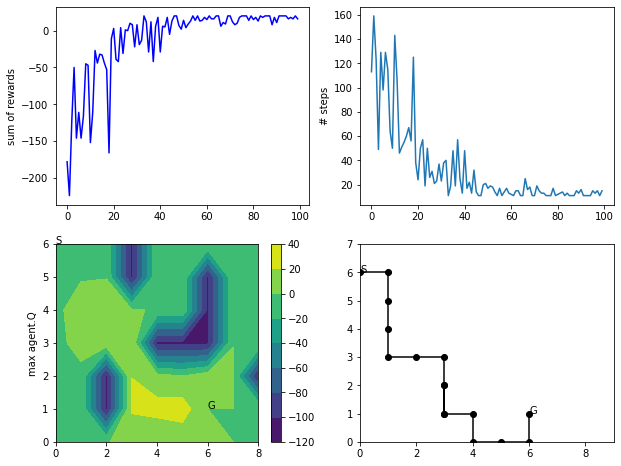

In [31]:
plot_train(agent, rtrace, steps, trace, start)

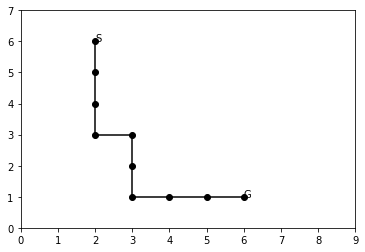

In [32]:
test_start = [0,2]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

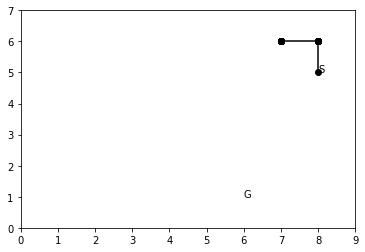

In [33]:
test_start = [1,8]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

Q: What do you think about the test results above? Does the agent run fine? 